In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection


In [2]:
db = pd.read_csv('HappinessAlcoholConsumption.csv')

## Pré-Processamento

### O banco de dados não tem nenhum dado faltando, como mostrado abaixo 

In [3]:
db.isnull().sum()

Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64

In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null int64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null int64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: int64(6), object(3)
memory usage: 8.7+ KB


### Utilizando *One Hot Encoding* para converter as colunas do tipo *object* para *inteiro*

In [5]:
db['Country'] = db['Country'].astype('category')
db['Region'] = db['Region'].astype('category')
db['Hemisphere'] = db['Hemisphere'].astype('category')
db['Country'] = db['Country'].cat.codes
db['Region'] = db['Region'].cat.codes
db['Hemisphere'] = db['Hemisphere'].cat.codes

### Visualizando a base de dados

In [6]:
db

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,32,8,1,7526,928,53579,224,81,278
1,103,8,1,7509,943,79866,185,100,280
2,49,8,1,7501,933,60530,233,61,78
3,81,8,1,7498,951,70890,169,71,129
4,38,8,1,7413,918,43433,263,133,97
5,20,5,1,7404,922,42349,240,122,100
6,76,8,1,7339,928,45638,251,88,190
7,77,0,3,7334,915,40332,203,79,175
8,4,0,3,7313,938,49897,261,72,212
9,102,8,1,7291,932,51845,152,60,186


### Os dados da coluna *HappinessScore* são medidas de 2016, perguntando às pessoas: "Como você classificaria sua felicidade em uma escala de 0 a 10, onde 10 é a mais feliz?". Assim estão representados de forma errada, pois são médias de 0 a 10. Para corrigir isso, vamos dividir os dados da coluna por 1000


In [7]:
db['HappinessScore'] = db['HappinessScore']/1000

### Removendo dados duplicados

In [8]:
db = db.drop_duplicates(None, 'first')

In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null int8
Region              122 non-null int8
Hemisphere          122 non-null int8
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null int64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(1), int64(5), int8(3)
memory usage: 7.0 KB


### Analisando a matriz de correlação 

In [10]:
df = pd.DataFrame(db)
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
Country,1,0.056,-0.022,0.038,0.0047,0.062,-0.052,-0.041,-0.04
Region,0.056,1,0.12,-0.082,-0.2,0.28,-0.075,-0.47,0.14
Hemisphere,-0.022,0.12,1,-0.23,-0.21,-0.13,0.0029,-0.27,-0.0082
HappinessScore,0.038,-0.082,-0.23,1,0.82,0.72,0.49,0.26,0.45
HDI,0.0047,-0.2,-0.21,0.82,1,0.71,0.59,0.39,0.6
GDP_PerCapita,0.062,0.28,-0.13,0.72,0.71,1,0.39,0.08,0.59
Beer_PerCapita,-0.052,-0.075,0.0029,0.49,0.59,0.39,1,0.36,0.47
Spirit_PerCapita,-0.041,-0.47,-0.27,0.26,0.39,0.08,0.36,1,0.12
Wine_PerCapita,-0.04,0.14,-0.0082,0.45,0.6,0.59,0.47,0.12,1


### Utilizando o boxplot para visualização de *outliers*.  Por se tratar do Índice de Produto Interno Bruto, a coluna GDP realmente tem dados distantes, então não é necessário a correção desses dados

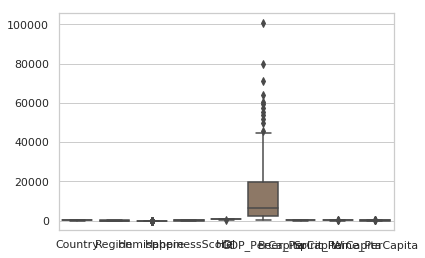

In [11]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=db);

### Dividindo DB entre treinamento e teste, deixando como saida a coluna HappinessScore


In [12]:
features = list(db)
features.remove('HappinessScore')

In [13]:
X = db[features]
y = db['HappinessScore']

In [14]:
from sklearn.model_selection import train_test_split

 #70% treinamento e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
def RegBay(Modelo, x_train, y_train, x_test, y_test): 
    model =Modelo()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    plt.plot(y_test, y_pred, '.')
    xg = np.linspace(0, 10, 1, endpoint=False)
    yg = xg
    plt.plot(xg, yg)
    plt.show()
    print(model.score(x_test, y_test))
    print(mean_absolute_error(y_test, y_pred,multioutput='uniform_average'), " Mean Absolute Error")


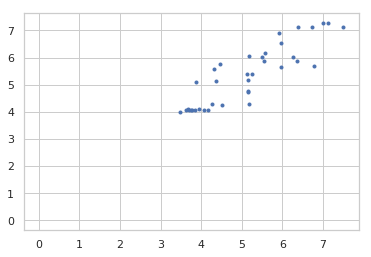

0.7253087549591467
0.484572972972973  Mean Absolute Error


In [20]:
RegBay(KNeighborsRegressor,X_train,y_train,X_test,y_test)

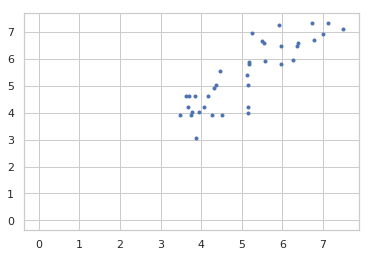

0.6211278944645781
0.5701891891891894  Mean Absolute Error


In [24]:
RegBay(DecisionTreeRegressor,X_train,y_train,X_test,y_test)

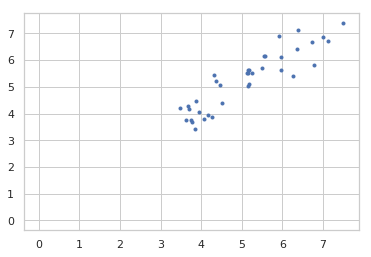

0.8011197294575753
0.4086665028973815  Mean Absolute Error


In [25]:
RegBay(LinearRegression,X_train,y_train,X_test,y_test)